# Quaternion Series Quantum Mechanics

by Doug Sweetser, email to sweetser@alum.mit.edu

This notebook is being created as a companion to the book "Quantum Mechanics: the Theoretical Minimum" by Susskind and Friedman (QM:TTM for short). Those authors of course never use quaternions as they are a bit player in the crowded field of mathematical tools. Nature has used one accounting system since the beginning of space-time, so I will be a jerk in the name of consistency. This leads to a different perspective on what makes an equation quantum mechanical. If a conjugate operator is used, then the expression is about quantum mechanics. It is odd to have such a brief assertion given the complexity of the subject, but that make the hypothesis fun - and testable by seeing if anything in the book cannot be done with quaternions and their conjugates. Import the tools to work with quaternions in this notebook.

In [2]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
import Q_tools as qt;

## Lecture 1: Systems and Experiments

### Bracket Notation and Three Identities

Bracket notation from this quaternion-centric perspective is just a quaternion product where the first term must necessarily be conjugated. I have called this the "Euclidean product". The quaternion product is associative but the Euclidean product is not ($(A^* B)^* C \ne A^* (B^* C)$ although their norms are equal). Write out three things in bracket notation that are known to be true about inner products(QM:TTH, p. 31).
1. $<A|A> \rightarrow A^* A$ is real
1. $<A|B> = <B|A>^* \rightarrow A^* B = (B^* A)^*$
1. $(<A|+<B|)|C> = <A|C> + <B|C> \rightarrow (A+ B)^*C = A^*C + B^* C$

This may provide the first signs that the odd math of quantum mechanics is the math of Euclidean products of quaternions.

So, is $A^* A$ real? Yes and no.

In [3]:
a0, A1, A2, A3 = sp.symbols("a0 A1 A2 A3")
b0, B1, B2, B3 = sp.symbols("b0 B1 B2 B3")
c0, C1, C2, C3 = sp.symbols("c0 C1 C2 C3")
A = qt.QH([a0, A1, A2, A3], qtype="A")
B = qt.QH([b0, B1, B2, B3], qtype="B")
C = qt.QH([c0, C1, C2, C3], qtype="C")
display(A.conj().product(A).t)
display(A.conj().product(A).x)
display(A.conj().product(A).y)
display(A.conj().product(A).z)

The first term is a real-valued, with the 3-imaginary vector equal to zero. I think it is bad practice to just pretend the three zeros are *not there in any way*. One can make an equivalence relation between quaternions of the form $(\mathbb{R}, 0, 0, 0)$ and the real numbers. The real numbers are a subgroup of quaternions, and never the other way around.

It is important to understand exactly why the three imaginary terms are zero. It is too common for people to say "it's the norm" and give the subject no thought. No thought means no insights. A quaternion points in the direction of itself, so all the anti-symmetric cross terms are equal to zero. The conjugate operator picks out the mirror reflection of the imaginary terms. The product of an imaginary with its mirror image is an all positive real number and zero for all three imaginary numbers.

Calculus is the story of neighborhoods near points. There are two broad classes of changes one can imagine for a norm. In the first, a point $A$ goes to $A'$. It could be either slightly bigger or smaller, shown in a slightly bigger or smaller first value. Or the mirror reflection to be slightly off. This would create a non-zero space-times-time 3-vector. Everyone accepts that a norm can get larger or smaller, it is a "size" thing. But a change in direction will lead to imaginary terms that can either commute, anti-commute, or be a mixture of both. This possibility makes this view of a quaternion norm sound richer.

Test out the second identity:

$$(A^* B)^* = (B^*, A)$$

In [4]:
AB_conj = A.Euclidean_product(B)
BA = B.Euclidean_product(A).conj()
print("(A* B)* = {}".format(AB_conj))
print("B* A    = {}".format(BA))
print("(A* B)* - B* A = {}".format(AB_conj.dif(BA)))

(A* B)* = (A1*B1 + A2*B2 + A3*B3 + a0*b0, -A1*b0 - A2*B3 + A3*B2 + B1*a0, A1*B3 - A2*b0 - A3*B1 + B2*a0, -A1*B2 + A2*B1 - A3*b0 + B3*a0) A*xB
B* A    = (A1*B1 + A2*B2 + A3*B3 + a0*b0, -A1*b0 - A2*B3 + A3*B2 + B1*a0, A1*B3 - A2*b0 - A3*B1 + B2*a0, -A1*B2 + A2*B1 - A3*b0 + B3*a0) B*xA*
(A* B)* - B* A = (0, 0, 0, 0) A*xB-B*xA*


Note on notation: someone pointed out that is *absolutely all calculations start and end with quaternions*, then it is easy to feel lost - this quaternion looks like that one. The string at the end that I call a "qtype" represents all the steps that went into a calculation. The last qtype above reads: A*xB-B*xA* which hopefully is clear in this contex.

Despite the fact that quaternions do not commute, the conjugate operator does the job correctly because the angle between the two quaternions does not change.

Now for the third identity about sums.

In [5]:
A_plus_B_then_C = A.conj().add(B.conj()).product(C).expand_q()
AC_plus_BC = A.conj().product(C).add(B.conj().product(C)).expand_q()
print("(A+B)* C:  {}\n".format(A_plus_B_then_C))
print("A*C + B*C: {}\n".format(AC_plus_BC))
print("(A+B)* C - (A*C + B*C): {}".format(A_plus_B_then_C.dif(AC_plus_BC)))

(A+B)* C:  (A1*C1 + A2*C2 + A3*C3 + B1*C1 + B2*C2 + B3*C3 + a0*c0 + b0*c0, -A1*c0 - A2*C3 + A3*C2 - B1*c0 - B2*C3 + B3*C2 + C1*a0 + C1*b0, A1*C3 - A2*c0 - A3*C1 + B1*C3 - B2*c0 - B3*C1 + C2*a0 + C2*b0, -A1*C2 + A2*C1 - A3*c0 - B1*C2 + B2*C1 - B3*c0 + C3*a0 + C3*b0) A*+B*xC

A*C + B*C: (A1*C1 + A2*C2 + A3*C3 + B1*C1 + B2*C2 + B3*C3 + a0*c0 + b0*c0, -A1*c0 - A2*C3 + A3*C2 - B1*c0 - B2*C3 + B3*C2 + C1*a0 + C1*b0, A1*C3 - A2*c0 - A3*C1 + B1*C3 - B2*c0 - B3*C1 + C2*a0 + C2*b0, -A1*C2 + A2*C1 - A3*c0 - B1*C2 + B2*C1 - B3*c0 + C3*a0 + C3*b0) A*xC+B*xC

(A+B)* C - (A*C + B*C): (0, 0, 0, 0) A*+B*xC-A*xC+B*xC


Subtracting one from the other shows they are identical.

There are many more algebraic relationships known for Hilbert spaces such as the triangle inequality and the Schwarz inequality which is the basis of the uncertainty principle. These all work for the [Euclidean product with quaternions](https://dougsweetser.github.io/Q/QM/bracket_notation/).

## Lecture 2: Quantum States

### Quaternion Series as Quantum States

A quantum state is an n-dimensional vector space. This is fundamentally different from a set of states because certain math relationships are allowed. Vectors can be added to one another, multiplied by complex numbers. One can take the inner product of two vectors. Most important calculations involve taking the inner product.

A perspective I will explore here is that a (possibly infinite) series of quaternions has the same algebraic properties of Hilbert spaces when one uses the Euclidean product, $A^* B = \sum_{1}^{n} a_n^* b_n$

![AxB.png](images/AxB.png)

This only works if the length of the series for **A** is exactly equal to that of **B**. Whatever can be done with a quaternion can be done with its series representation. Unlike vectors that can either be be a row or a column, quaternion series only have a length. Let's just do one calculation, < A | A >:

In [6]:
A = qt.QHStates([qt.QH([0,1,2,3]), qt.QH([1,2,1,2])])
AA = A.Euclidean_product('bra', ket=A)
AA.print_states("<A|A>")

<A|A>
n=1: (14, 0, 0, 0) Q*xQ
n=2: (10, 0, 0, 0) Q*xQ
sum= (24, 0, 0, 0) Q*xQ+Q*xQ


A little calculation in the head should show this works as expected - except one is not used to seeing quaternion series in action.

The first system analyzed has but 2 states, keeping things simple. The first pair of states are likewise so simple they are orthonormal to a casual observer.

In [7]:
q0, q1, qi, qj, qk = qt.QH().q_0(), qt.QH().q_1(), qt.QH().q_i(), qt.QH().q_j(), qt.QH().q_k()

u = qt.QHStates([q1, q0])
d = qt.QHStates([q0, q1])

u.print_states("u", True)
d.print_states("d")

u
n=1: (1, 0, 0, 0) 1
n=2: (0, 0, 0, 0) 0
sum= (1, 0, 0, 0) 1+0

d
n=1: (0, 0, 0, 0) 0
n=2: (1, 0, 0, 0) 1
sum= (1, 0, 0, 0) 0+1


Calculate $<u|u>$, $<d|d>$ and $<u|d>$:

In [10]:
u.Euclidean_product('bra', ket=u).print_states("<u|u>")

<u|u>
n=1: (1, 0, 0, 0) 1*x1
n=2: (0, 0, 0, 0) 0*x0
sum= (1, 0, 0, 0) 1*x1+0*x0


In [9]:
d.Euclidean_product('bra', ket=d).print_states("<d|d>")

<d|d>
n=1: (0, 0, 0, 0) 0*x0
n=2: (1, 0, 0, 0) 1*x1
sum= (1, 0, 0, 0) 0*x0+1*x1


In [12]:
u.Euclidean_product('bra', ket=d).print_states("<u|d>")

<u|d>
n=1: (0, 0, 0, 0) 1*x0
n=2: (0, 0, 0, 0) 0*x1
sum= (0, 0, 0, 0) 1*x0+0*x1


The next pair of states is constructed from the first pair, $u$ and $d$ like so (QM:TTM, page 41):

In [15]:
sqrt_2op = qt.QHStates([qt.QH([sp.sqrt(1/2), 0, 0, 0])])

u2 = u.Euclidean_product('ket', operator=sqrt_2op)
d2 = d.Euclidean_product('ket', operator=sqrt_2op)

r = u2.add(d2)
L = u2.dif(d2)

r.print_states("r", True)
L.print_states("L")

r
n=1: (0.707106781186548, 0, 0, 0) Qx1+0x0+Qx0+0x1
n=2: (0.707106781186548, 0, 0, 0) 0x1+Qx0+0x0+Qx1
sum= (1.41421356237310, 0, 0, 0) Qx1+0x0+Qx0+0x1+0x1+Qx0+0x0+Qx1

L
n=1: (0.707106781186548, 0, 0, 0) Qx1+0x0-Qx0+0x1
n=2: (-0.707106781186548, 0, 0, 0) 0x1+Qx0-0x0+Qx1
sum= (0, 0, 0, 0) Qx1+0x0-Qx0+0x1+0x1+Qx0-0x0+Qx1


In [16]:
r.Euclidean_product('bra', ket=r).print_states("<r|r>", True)
L.Euclidean_product('bra', ket=L).print_states("<L|L>", True)
r.Euclidean_product('bra', ket=L).print_states("<r|L>", True)

<r|r>
n=1: (0.500000000000000, 0, 0, 0) Qx1+0x0+Qx0+0x1*xQx1+0x0+Qx0+0x1
n=2: (0.500000000000000, 0, 0, 0) 0x1+Qx0+0x0+Qx1*x0x1+Qx0+0x0+Qx1
sum= (1.00000000000000, 0, 0, 0) Qx1+0x0+Qx0+0x1*xQx1+0x0+Qx0+0x1+0x1+Qx0+0x0+Qx1*x0x1+Qx0+0x0+Qx1

<L|L>
n=1: (0.500000000000000, 0, 0, 0) Qx1+0x0-Qx0+0x1*xQx1+0x0-Qx0+0x1
n=2: (0.500000000000000, 0, 0, 0) 0x1+Qx0-0x0+Qx1*x0x1+Qx0-0x0+Qx1
sum= (1.00000000000000, 0, 0, 0) Qx1+0x0-Qx0+0x1*xQx1+0x0-Qx0+0x1+0x1+Qx0-0x0+Qx1*x0x1+Qx0-0x0+Qx1

<r|L>
n=1: (0.500000000000000, 0, 0, 0) Qx1+0x0+Qx0+0x1*xQx1+0x0-Qx0+0x1
n=2: (-0.500000000000000, 0, 0, 0) 0x1+Qx0+0x0+Qx1*x0x1+Qx0-0x0+Qx1
sum= (0, 0, 0, 0) Qx1+0x0+Qx0+0x1*xQx1+0x0-Qx0+0x1+0x1+Qx0+0x0+Qx1*x0x1+Qx0-0x0+Qx1



The final calculation for chapter 2 is like the one for $r$ and $L$ except one uses an arbitrarily chosen imaginary value - it could point any direction in 3D space - like so:

In [20]:
i_op = qt.QHStates([q1, q0, q0, qi])

i = r.Euclidean_product('ket', operator=i_op)
o = L.Euclidean_product('ket', operator=i_op)

i.print_states("i", True)
o.print_states("o")

i
n=1: (0.707106781186548, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1
n=2: (0, 0.707106781186548, 0, 0) 0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1
sum= (0.707106781186548, 0.707106781186548, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1

o
n=1: (0.707106781186548, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1
n=2: (0, -0.707106781186548, 0, 0) 0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1
sum= (0.707106781186548, -0.707106781186548, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1


In [22]:
i.Euclidean_product('bra', ket=i).print_states("<i|i>", True)
o.Euclidean_product('bra', ket=o).print_states("<o|o>", True)
i.Euclidean_product('bra', ket=o).print_states("<i|o>")

<i|i>
n=1: (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1
n=2: (0.500000000000000, 0, 0, 0) 0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1
sum= (1.00000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1

<o|o>
n=1: (0.500000000000000, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1
n=2: (0.500000000000000, 0, 0, 0) 0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1
sum= (1.00000000000000, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1

<i|o>
n=1: (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1
n=2: (-0.500000000000000, 0, 0, 0) 0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0xQx1+0x0-Qx0+0

Notice how long the qtypes have gotten (the strings that keep a record of all the manipulations done to a quaternion). The initial state was just a zero and a one, but that had to get added to another and normalized, then multiplied by a factor of $i$ and combined again.

Orthonormal again, as hoped for.

Is the quaternion series approach a faithful representation of these 6 states? On page 43-44, there are 8 products that all add up to one half. See if this works out...

In [26]:
ou = o.Euclidean_product('bra', ket=u)
uo = i.Euclidean_product('bra', ket=o)
print("ouuo sum:\n", ou.product('bra', ket=uo).summation(), "\n")
od = o.Euclidean_product('bra', ket=d)
do = d.Euclidean_product('bra', ket=o)
print("oddo sum:\n", od.product('bra', ket=do).summation(), "\n")
iu = i.Euclidean_product('bra', ket=u)
ui = u.Euclidean_product('bra', ket=i)
print("iuui sum:\n", iu.product('bra', ket=ui).summation(), "\n")
id = i.Euclidean_product('bra', ket=d)
di = d.Euclidean_product('bra', ket=i)
print("iddi sum:\n", id.product('bra', ket=di).summation())

ouuo sum:
 (0.353553390593274, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*x1x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x0x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1 

oddo sum:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*x0x0*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x1x1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1 

iuui sum:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x1x1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0x0*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1 

iddi sum:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*x0x0*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x1x1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1


In [28]:
Or = o.Euclidean_product('bra', ket=r)
ro = r.Euclidean_product('bra', ket=o)
print("orro:\n", Or.product('bra', ket=ro).summation(), "\n")
oL = o.Euclidean_product('bra', ket=L)
Lo = L.Euclidean_product('bra', ket=o)
print("oLLo:\n", oL.product('bra', ket=Lo).summation(), "\n")
ir = i.Euclidean_product('bra', ket=r)
ri = r.Euclidean_product('bra', ket=i)
print("irri:\n", ir.product('bra', ket=ri).summation(), "\n")
iL = i.Euclidean_product('bra', ket=L)
Li = L.Euclidean_product('bra', ket=i)
print("iLLi:\n", iL.product('bra', ket=Li).summation())

orro:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*xQx1+0x0+Qx0+0x1xQx1+0x0+Qx0+0x1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x0x1+Qx0+0x0+Qx1x0x1+Qx0+0x0+Qx1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1 

oLLo:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1*xQx1+0x0-Qx0+0x1xQx1+0x0-Qx0+0x1*x1xQx1+0x0-Qx0+0x1+0x0x1+Qx0-0x0+Qx1+0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1*x0x1+Qx0-0x0+Qx1x0x1+Qx0-0x0+Qx1*x0xQx1+0x0-Qx0+0x1+ix0x1+Qx0-0x0+Qx1 

irri:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*xQx1+0x0+Qx0+0x1xQx1+0x0+Qx0+0x1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0x1+Qx0+0x0+Qx1x0x1+Qx0+0x0+Qx1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1 

iLLi:
 (0.500000000000000, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*xQx1+0x0-Qx0+0x1xQx1+0x0-Qx0+0x1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0x1+Qx0-0x0+Qx1x0x1+Qx0-0x0+Qx1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1


There is an important technical detail in this calculation I should point out. In the <bra|ket> form, the bra gets conjugated. Notice though that if one does two of these, < i | L >< L | i >, then there has to be a product formed between the two brackets. In practice, < i | L >* < L | i > gives the wrong result:

In [29]:
print("iL*Li:\n", iL.Euclidean_product('bra', ket=Li).summation())

iL*Li:
 (0, 0, 0, 0) 1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1*xQx1+0x0-Qx0+0x1*xQx1+0x0-Qx0+0x1*x1xQx1+0x0+Qx0+0x1+0x0x1+Qx0+0x0+Qx1+0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1*x0x1+Qx0-0x0+Qx1*x0x1+Qx0-0x0+Qx1*x0xQx1+0x0+Qx0+0x1+ix0x1+Qx0+0x0+Qx1


## Lecture 3: Principles of Quantum Mechanics

Quaternion series do not come as either columns or rows, they only have a length. So how does one construct an nxm matrix essential for operators used in quantum mechanics? Just construct a series that has a length of nxm. One can think of the matrix as being sliced into columns and then glued tail-to-head.

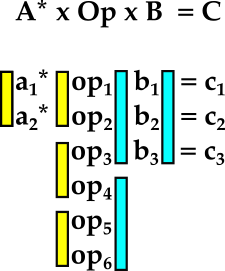

In the case shown, $A$ had 2 states, $B$ has three, so to form the inner product takes 6 an operator with 6 states. If the operator first acts on $A$, it needs to be viewed as three pairs. The resulting three can then form an inner product with $B$. If instead the operator acts on $B$ first, then the operator is two triplets. The result of forming the inner product can be either a state with length two or three. 

In [30]:
B = qt.QHStates([q1.add(qj), qi.add(qk), qk])
Op = qt.QHStates([q1, qi, qj, qk, q0, qi])
A.Euclidean_product('bra', ket=B, operator=Op).print_states("<A|Op|B>")

<A|Op|B>
n=1: (1, 0, -3, 2) Q*x1x1+j+ixi+k+jxk
n=2: (-1, -4, 3, 2) Q*xkx1+j+0xi+k+ixk
sum= (0, -4, 0, 4) Q*x1x1+j+ixi+k+jxk+Q*xkx1+j+0xi+k+ixk


It would require some work to confirm this answer was correct, but it does at least show the software was written to multiply the operator time the ket first, leading to the state with a length of 2.

The first quality an operator must have is that it give just one result. That is how these quaternion series operators work. Note that not any quaternion series will do as there is an algebraic constraint for the operation to make sense, namely the dimensions of the operator modulo the dimensions of the ket vector must be zero.

One of the first operations is to multiply a ket vector by a number which can be real, complex, or a full quaternion. What one needs is a "diagonal" series, thing of a matrix with the same values down the diagonal and zeroes everywhere else. If the function Euclidean_product() is given an operator that only has one value, it constructs a series of size nxn, the first and last values being the number, along with the number appearing at the right place.

In [31]:
Op3 = qt.QHStates([qt.QH([3,0,0,0])])
Op3B = B.Euclidean_product('ket', operator=Op3).print_states("3|B>")

3|B>
n=1: (3, 0, 3, 0) Qx1+j+0xi+k+0xk
n=2: (0, 3, 0, 3) 0x1+j+Qxi+k+0xk
n=3: (0, 0, 0, 3) 0x1+j+0xi+k+Qxk
sum= (3, 3, 3, 6) Qx1+j+0xi+k+0xk+0x1+j+Qxi+k+0xk+0x1+j+0xi+k+Qxk


A real valued quaternion commutes with all. That makes things simple. It is odd, but when one uses quaternions that admittedly do not commute, people often think this breaks everything. The way quaternions behave is quite precise and so is easy to manage. The commuting part of a product (I call it {even}), does not change when the order is switched. Tha anti-commuting part (called \[odd\]) will flip signs.
$$ Op q| B> = ({Op, q} + [Op, q])|B> = ({Op, q} - [Op, q])|B> $$ 

This issue led to a broader one: how exactly should one multiply an operator by a number? It is pretty simple: take every member of the operator and multiply it by said number. This required a new function be written, op_n(). Realize that in standard quantum mechanics done over a the commuting complex numbers, there is no difference between:
$$ Op * q = q * Op$$
For quaternions, there is no difference between:
$$ Op * q = \rm{even} \{q, Op\} - \rm{odd}[q, Op] $$ 

In [33]:
op_q1234 = Op.op_n(n=qt.QH([1,2,3,4]))
q1234_op = Op.op_n(n=qt.QH([1,2,3,4]), first=False, reverse=True)
op_q1234.print_states("op q", True)
q1234_op.print_states("q op", True)
op_q1234.equals(q1234_op)

op q
n=1: (1, 2, 3, 4) 1xQ
n=2: (-2, 1, -4, 3) ixQ
n=3: (-3, 4, 1, -2) jxQ
n=4: (-4, -3, 2, 1) kxQ
n=5: (0, 0, 0, 0) 0xQ
n=6: (-2, 1, -4, 3) ixQ
sum= (-10, 5, -2, 9) 1xQ+ixQ+jxQ+kxQ+0xQ+ixQ

q op
n=1: (1, 2, 3, 4) QxR1
n=2: (-2, 1, -4, 3) QxRi
n=3: (-3, 4, 1, -2) QxRj
n=4: (-4, -3, 2, 1) QxRk
n=5: (0, 0, 0, 0) QxR0
n=6: (-2, 1, -4, 3) QxRi
sum= (-10, 5, -2, 9) QxR1+QxRi+QxRj+QxRk+QxR0+QxRi



True

In math, two reversals can leave things unchanged. In this case, one can change the order of any two quaternions so long as the odd part is subtracted instead of added to the even part.

It was shown for quaternions that $(A+B)^∗ C=A^∗ C+B^∗ C$. It seams obvious to me that this should be true for quaternion series - it is good for one quaternion, so it will be good for many done in a row.

Operators and kets are both being represented as quaternion series, albeit of different lengths. From pages 54-56 in QM:TTM, they give a simple example of a 3x3 operator action on a 3-ket. That can be replicated using an operator that has 9 elements in its states acting on a ket with three quaternions. Here is a simple symbolic calculation:

In [34]:
k1, k2, k3 = sp.symbols("k1 k2 k3")
op11, op12, op13, op21, op22, op23, op31, op32, op33 = sp.symbols("op11 op12 op13 op21 op22 op23 op31 op32 op33")
k12 = qt.QHStates([qt.QH([k1, 0, 0, 0]), qt.QH([k2, 0, 0, 0]), qt.QH([k3, 0, 0, 0])])
Op2x2 = qt.QHStates([qt.QH([op11, 0, 0, 0]), qt.QH([op12, 0, 0, 0]), qt.QH([op13, 0, 0, 0]), qt.QH([op21, 0, 0, 0]), qt.QH([op22, 0, 0, 0]), qt.QH([op23, 0, 0, 0]), qt.QH([op31, 0, 0, 0]), qt.QH([op32, 0, 0, 0]), qt.QH([op33, 0, 0, 0])])
k12.Euclidean_product('ket', operator=Op2x2).print_states("Op2x2|k1>")

Op2x2|k1>
n=1: (k1*op11 + k2*op12 + k3*op13, 0, 0, 0) QxQ+QxQ+QxQ
n=2: (k1*op21 + k2*op22 + k3*op23, 0, 0, 0) QxQ+QxQ+QxQ
n=3: (k1*op31 + k2*op32 + k3*op33, 0, 0, 0) QxQ+QxQ+QxQ
sum= (k1*op11 + k1*op21 + k1*op31 + k2*op12 + k2*op22 + k2*op32 + k3*op13 + k3*op23 + k3*op33, 0, 0, 0) QxQ+QxQ+QxQ+QxQ+QxQ+QxQ+QxQ+QxQ+QxQ


To make things simpler to track, all values were real. The expected partners got together. Each state is the sum of three products. It should be easy to get scared of the complexity were all the values to be filled in.

Is a quaternions series operator a have a particular Eigen series (p57)?  Just multiply them out and compare.

In [35]:
q2 = qt.QH([2, 0, 0, 0])
q3 = qt.QH([3, 0, 0, 0])
k11 = qt.QHStates([q1, q1])
M = qt.QHStates([q1, q2, q2, q1])
M3 = qt.QHStates([q3])

Mk11 =  k11.Euclidean_product('ket', operator=M)
M3k11 = k11.Euclidean_product('ket', operator=M3)

print("Is Mk11 == M3k11? ", Mk11.equals(M3k11))
Mk11.print_states("Mk11")

Is Mk11 == M3k11?  True
Mk11
n=1: (3, 0, 0, 0) 1x1+Qx1
n=2: (3, 0, 0, 0) Qx1+1x1
sum= (6, 0, 0, 0) 1x1+Qx1+Qx1+1x1


In [36]:
k1j = qt.QHStates([q1, qj])
M11 = qt.QHStates([q0, q1.flip_signs(), q1, q0])
Mi = qt.QHStates([qj.flip_signs()])
M11k1j = k1j.Euclidean_product('ket', operator=M11)
Mik1j =  k1j.Euclidean_product('ket', operator=Mi)

print("Is M11k1j == Mik1j? ", M11k1j.equals(Mik1j))
M11k1j.print_states("M11k1j")

Is M11k1j == Mik1j?  True
M11k1j
n=1: (0, 0, -1, 0) 0x1+1*-1xj
n=2: (1, 0, 0, 0) 1x1+0xj
sum= (1, 0, -1, 0) 0x1+1*-1xj+1x1+0xj


The question asked in the book used $i$, but it should be clear there is a very open area of study of matching Eigen vectors with Eigen values.

Let's construct a Hermitian quaternion series. Taking the conjugate of each term of a quaternion series is simple enough. To do a transpose requires that the product of two numbers equals the full length. Then one changes the order of these two numbers. See a simple example:

In [37]:
q1234 = qt.QHStates([qt.QH([1, 0, 0, 0]), qt.QH([2, 2, 0, 0]), qt.QH([3, -3, 0, 0]), qt.QH([4, 0, 0, 0])])
q1234.print_states("q1234", True)
q1234.transpose().print_states("q1234 transpose", True)
q1234.Hermitian_conj().print_states("q1234 Hermitian conj", True)
q1234.Hermitian_conj().normalize().print_states("q1234 normalized Hermitian conj", True)
print("q1234, normalized, is it Hermitian?", q1234.normalize().is_Hermitian())

q1234
n=1: (1, 0, 0, 0) Q
n=2: (2, 2, 0, 0) Q
n=3: (3, -3, 0, 0) Q
n=4: (4, 0, 0, 0) Q
sum= (10, -1, 0, 0) Q+Q+Q+Q

q1234 transpose
n=1: (1, 0, 0, 0) Q
n=2: (3, -3, 0, 0) Q
n=3: (2, 2, 0, 0) Q
n=4: (4, 0, 0, 0) Q
sum= (10, -1, 0, 0) Q+Q+Q+Q

q1234 Hermitian conj
n=1: (1, 0, 0, 0) Q*
n=2: (3, 3, 0, 0) Q*
n=3: (2, -2, 0, 0) Q*
n=4: (4, 0, 0, 0) Q*
sum= (10, 1, 0, 0) Q*+Q*+Q*+Q*

q1234 normalized Hermitian conj
n=1: (1.0, 0.0, 0.0, 0.0) Q*U
n=2: (0.7071067811865476, 0.7071067811865476, 0.0, 0.0) Q*U
n=3: (0.7071067811865475, -0.7071067811865475, 0.0, 0.0) Q*U
n=4: (1.0, 0.0, 0.0, 0.0) Q*U
sum= (3.414213562373095, 1.1102230246251565e-16, 0.0, 0.0) Q*U+Q*U+Q*U+Q*U

q1234, normalized, is it Hermitian? True


So what do we think a Hermitian operator will do that is different from a non-Hermitian one to quaternion states? The inner product of a ket with itself create states that are all real numbers and all zero imaginary numbers:

In [38]:
B.Euclidean_product('bra', ket=B).print_states("<B|B>")

<B|B>
n=1: (2, 0, 0, 0) 1+j*x1+j
n=2: (2, 0, 0, 0) i+k*xi+k
n=3: (1, 0, 0, 0) k*xk
sum= (5, 0, 0, 0) 1+j*x1+j+i+k*xi+k+k*xk


Different normalized Hermitian operators should shift the real number values around, but remain real values. A non-Hermitian matrix should make the imaginary values be non-zero.

In [39]:
q2 = qt.QH([2, 0, 0, 0])
q4 = qt.QH([4, 0, 0, 0])
q10 = qt.QH([10, 0, 0, 0])
q2121 = qt.QH([2, 1, 2, 1])
q3033 = qt.QH([3, 0, 3, 3])
q4321 = qt.QH([4, 3, 2, 1])

h_1 = qt.QHStates([q2, q2121, q3033, q2121.conj(), q4, q4321, q3033.conj(), q4321.conj(), q10]).normalize()
h_2 = qt.QHStates([q2, qi, q3033, qi.conj(), q4, q4321, q3033.conj(), q4321.conj(), q10]).normalize()
not_h = qt.QHStates([q2121, q2, q3033, qi, q4, q4321, q3033, q4321, q10]).normalize()

print("is h_1 Hermitian? ", h_1.is_Hermitian())
print("is h_2 Hermitian? ", h_2.is_Hermitian())
print("is not_h Hermitian? ", not_h.is_Hermitian())

is h_1 Hermitian?  True
is h_2 Hermitian?  True
is not_h Hermitian?  False


Form the inner product with $B$ using these three operators.

In [40]:
B.Euclidean_product('bra', ket=B, operator=h_1).print_states("<B|h_1 B>", True)
B.Euclidean_product('bra', ket=B, operator=h_2).print_states("<B|h_2 B>", True)
B.Euclidean_product('bra', ket=B, operator=not_h).print_states("<B|not_h B>")

<B|h_1 B>
n=1: (0.7901941987766985, 1.2649110640673515, 1.2098058012233015, 2.419611602446603) 1+j*xQUx1+j+QUxi+k+QUxk
n=2: (2.4629895829766566, -1.6300594357374623, -0.26730716036356506, -0.5346143207271301) i+k*xQ*Ux1+j+QUxi+k+QUxk
n=3: (1.5180948458207064, 0.3651483716701107, -0.9424986408597364, -1.884997281719473) k*xQ*Ux1+j+Q*Uxi+k+QUxk
sum= (4.771278627574062, 0.0, 0.0, 0.0) 1+j*xQUx1+j+QUxi+k+QUxk+i+k*xQ*Ux1+j+QUxi+k+QUxk+k*xQ*Ux1+j+Q*Uxi+k+QUxk

<B|h_2 B>
n=1: (-0.5773502691896257, 0.0, 0.5773502691896257, 1.1547005383792515) 1+j*xQUx1+j+iUxi+k+QUxk
n=2: (1.0954451150103321, -0.3651483716701107, 0.3651483716701107, 0.7302967433402214) i+k*xi*Ux1+j+QUxi+k+QUxk
n=3: (1.5180948458207064, 0.3651483716701107, -0.9424986408597364, -1.884997281719473) k*xQ*Ux1+j+Q*Uxi+k+QUxk
sum= (2.036189691641413, 0.0, 0.0, 0.0) 1+j*xQUx1+j+iUxi+k+QUxk+i+k*xi*Ux1+j+QUxi+k+QUxk+k*xQ*Ux1+j+Q*Uxi+k+QUxk

<B|not_h B>
n=1: (0.6875607948777258, -0.6324555320336755, 1.8422613332569773, 3.787156070412927) 

So it is only the sum that nets out to have zero imaginaries. Different normalized Hermitian operators have different sums, something I did not anticipate. Notice for these two examples, the value was less. Is that a real limit or not?

### Appendix: The Three Conjugate Operators for Quaternions

Start with the conjugate operator all are familiar with, the one that flips all three imaginary numbers as the Gang of Three:

In [27]:
t, x, y, z = sp.symbols("t x y z")
R = qt.QH([t, x, y, z])
print(R)
print(R.conj())

(t, x, y, z) Q
(t, -x, -y, -z) Q*


With complex numbers, any function that one can represent in $\mathbb{R}^2$ can just as well be represented with $\mathbb{C}^1$ using $z$ and $z^*$. The same cannot be said using just one quaternion conjugate, there needs to be two others. The idea is not complicated. In the standard conjugate, the real-valued $t$ gets to keep its sign. Why not let other terms have that privilege? If one were to pre- and post-multiply by the imaginary $i$, every term goes back to their original chairs. Both $t$ and $x$ are real at one step of the triple product, and get one minus sign, so stay negative. The $y$ and $z$ get two sign flips, so remain positive about the operation. If one takes the conjugate of this triple product, then $x$ will be the only positive term. I call this the first conjugate.

In [28]:
Qi, Qj, Qk = qt.QH([0, 1, 0, 0]), qt.QH([0, 0, 1, 0]), qt.QH([0, 0, 0, 1])
first_conj = Qi.product(R.product(Qi)).conj()
print(first_conj)

(-t, x, -y, -z) QxQxQ*


The same trick can be done for the second conjugate using a triple product with $j$. The conj() operator has been designed to take the value of 1 or 2 and generate the appropriate conjugate.

In [29]:
print(R.conj(1))
print(R.conj(2))

(-t, x, -y, -z) Q*1
(-t, -x, y, -z) Q*2


What about the third conjugate operator? Look what happens when we combine the three we have.

In [30]:
print(R.conj().conj(1).conj(2))

(t, x, y, -z) Q**1*2


It is a sign flip a way from doing the job, so flip the signs.

In [31]:
print(R.conj().conj(1).conj(2).flip_signs())

(-t, -x, -y, z) Q**1*2*-1


Having another conjugate operator is not necessary. Mathematics aspires to be minimalist.

Note that the first and second conjugates do not have the "make it all real" property that the regular conjugate does. This is due to the fact that the operations point the 3-vector in a different direction. See what happens when one uses the same operation on the two other conjugate functions:

In [32]:
print(A.conj(1).product(A))
print(A.conj(2).product(A))

n=1: (0, 1, 2, 3) Q
n=2: (1, 2, 1, 2) Q
n=1: (0, 1, 2, 3) Q
n=2: (1, 2, 1, 2) Q


This result was not what I expected. The square of the norm, $A^* A$, has three zero terms and one non-negative one. The opposite situation occurs for the first and second conjugates: there is one zero, and potentially three non-zero terms. At this point, I don't know what this mean, but will keep the observation in mind.

Does this identity hold for the first and second conjugates?

$$(<A|+<B|)|C> = <A|C> + <B|C> \rightarrow (A+ B)^*C = A^*C + B^* C$$

In [33]:
A_plus_B_then_C_conj1 = A.conj(1).add(B.conj(1)).product(C)
AC_plus_BC_conj1 = A.conj(1).product(C).add(B.conj(1).product(C))
print(A_plus_B_then_C_conj1)
print(AC_plus_BC_conj1)
print(AC_plus_BC_conj1.dif(AC_plus_BC_conj1))

The dimensions are not the same: 2 != 3


AttributeError: 'NoneType' object has no attribute 'product'

In [ ]:
A_plus_B_then_C_conj2 = A.conj(2).add(B.conj(2)).product(C)
AC_plus_BC_conj2 = A.conj(2).product(C).add(B.conj(2).product(C))
print(A_plus_B_then_C_conj2)
print(AC_plus_BC_conj2)
print(AC_plus_BC_conj2.dif(AC_plus_BC_conj2))

This identity does apply to all three conjugate operators.

In [ ]:
q2 = qt.QH([2,0,0,0])
h2112 = qt.QHStates([q2, q1, q1, q2])
b11 = qt.QHStates([q1, q1])
print(Euclidean_product(ket=b11, operator=h2112))

In [ ]:
def is_Eigen(operator, ket):
    """Determines if an operator/ket pair forms an Eigen-value/Eigen-vector pair.
    Returns either zero quaternion or the quaternion multiplier lambda."""
    
    op_ket = Euclidean_product(operator=operator, ket=ket)
    
    q1 = op_ket.qs.pop()
    
    is_equal = True
    
    for q in op_ket.qs:
        test = q1.equals(q)
        
        if not test:
            is_equal = False
            
    if is_equal:
        return q
    
    else:
        return qt.QH().q_0()

In [ ]:
print(is_Eigen(operator=h2112, ket=b11))

In [ ]:
qi1 = qt.QHStates([qi.flip_signs(), q1]) = qt.QHStates([q1, qj])
M = qt.QHStates([q0, q1, q1.flip_signs(), q0])
print(is_Eigen(operator=M, ket=k1j))

In [ ]:
print(Euclidean_product(operator=qt.QHStates([3,0,0,0]), ket=h2112.invert()))

In [ ]:
qi1 = qt.QHStates([qi.flip_signs(), q1])
k1j_inv = k1j.invert()
qt.QHStates().product(bra=qi1, ket=k1j_inv).print_states("w")

In [ ]:
print(A)

In [ ]:
k1, k2, k3 = sp.symbols("k1 k2 k3")
op11, op12, op13, op21, op22, op23, op31, op32, op33 = sp.symbols("op11 op12 op13 op21 op22 op23 op31 op32 op33")
k12 = qt.QHStates([qt.QH([k1, 0, 0, 0]), qt.QH([k2, 0, 0, 0]), qt.QH([k3, 0, 0, 0])])
Op2x2 = qt.QHStates([qt.QH([op11, 0, 0, 0]), qt.QH([op12, 0, 0, 0]), qt.QH([op13, 0, 0, 0]), qt.QH([op21, 0, 0, 0]), qt.QH([op22, 0, 0, 0]), qt.QH([op23, 0, 0, 0]), qt.QH([op31, 0, 0, 0]), qt.QH([op32, 0, 0, 0]), qt.QH([op33, 0, 0, 0])])
Euclidean_product(ket=k12, operator=Op2x2).print_states("Op2x2|k1>")

In [ ]:
print(qj)